In [218]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objs as go

# Lectura de datos

# Reglas a Priori

In [263]:
# Ordenar de más reciente a más antigua
df_products = df_priori[["Creation Date", "SKU Name", "Reference Code"]]
df_products = df_products.sort_values(by="Creation Date", ascending=False)
df_products = df_products.drop(columns=["Creation Date"])
df_products = df_products.drop_duplicates(subset=["Reference Code"])

### Preparación de datos

In [264]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth

In [265]:
df_priori['Order'] = df_priori['Order'].astype(str)
df_priori['SKU Name'] = df_priori['SKU Name'].astype(str)
df_priori['Reference Code'] = df_priori['Reference Code'].astype(str)

C:\Users\ssjsmoncada\AppData\Local\Temp\ipykernel_31040\946442530.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ssjsmoncada\AppData\Local\Temp\ipykernel_31040\946442530.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ssjsmoncada\AppData\Local\Temp\ipykernel_31040\946442530.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [266]:
# agrupar productos por orden (una lista por cada orden)
basket = df_priori.groupby('Order')['Reference Code'].apply(list)
basket.head()

Order
1400180521822-01    [2015271, 2015274, 2018640, 2019272]
1400220521823-01                               [1034652]
1400220521824-01                               [2013823]
1400220521825-01                               [2018288]
1400240521826-01                               [2017677]
Name: Reference Code, dtype: object

In [267]:
basket.shape

(30030,)

In [268]:
basket = basket[basket.apply(lambda x: len(x) > 1)]

In [269]:
basket.head()

Order
1400180521822-01                                                          [2015271, 2015274, 2018640, 2019272]
1400250521827-01    [1063422, 1051746, 2017690, 2015886, 2015884, 2010147, 2006353, 2017237, 2020875, 1035356]
1400270521829-01                                                                            [2010300, 1029614]
1400270521830-01                                                          [2011706, 1000083, 1037897, 2015886]
1400380521831-01                                                 [2020120, 1051111, 1064019, 1059171, 1067664]
Name: Reference Code, dtype: object

In [270]:
basket.shape

(21359,)

In [271]:
# One-Hot Encoding de las transacciones
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_, index=basket.index)
df_encoded.head()

1  1000081  1000083  1000084  1000145  1000182  1000195  \
Order                                                                           
1400180521822-01  False    False    False    False    False    False    False   
1400250521827-01  False    False    False    False    False    False    False   
1400270521829-01  False    False    False    False    False    False    False   
1400270521830-01  False    False     True    False    False    False    False   
1400380521831-01  False    False    False    False    False    False    False   

                  1000305  1000307  1000395  1000445  1000446  1000447  \
Order                                                                    
1400180521822-01    False    False    False    False    False    False   
1400250521827-01    False    False    False    False    False    False   
1400270521829-01    False    False    False    False    False    False   
1400270521830-01    False    False    False    False    False    False   
1400380521831-01    False    False    False    False    False    False   

                  1000582  1000792  1000853  1000855  1001069  1001311  \
Order                                                                    
1400180521822-01    False    False    False    False    False    False   
1400250521827-01    False    False    False    False    False    False   
1400270521829-01    False    False    False    False    False    False   
1400270521830-01    False    False    False    False    False    False   
1400380521831-01    False    False    False    False    False    False   

                  1001434  1001438  1001439  1001440  1001441  1001442  \
Order                                                                    
1400180521822-01    False    False    False    False    False    False   
1400250521827-01    False    False    False    False    False    False   
1400270521829-01    False    False    False    False    False    False   
1400270521830-01    False    False    False    False    False    False   
1400380521831-01    False    False    False    False    False    False   

                  1001444  1001445  1001446  1001447  1001448  1001449  \
Order                                                                    
1400180521822-01    False    False    False    False    False    False   
1400250521827-01    False    False    False    False    False    False   
1400270521829-01    False    False    False    False    False    False   
1400270521830-01    False    False    False    False    False    False   
1400380521831-01    False    False    False    False    False    False   

                  1001450  1001451  1001452  1001453  1001454  1001455  \
Order                                                                    
1400180521822-01    False    False    False    False    False    False   
1400250521827-01    False    False    False    False    False    False   
1400270521829-01    False    False    False    False    False    False   
1400270521830-01    False    False    False    False    False    False   
1400380521831-01    False    False    False    False    False    False   

                  1001456  1001462  1001463  1001464  1001465  1001467  \
Order                                                                    
1400180521822-01    False    False    False    False    False    False   
1400250521827-01    False    False    False    False    False    False   
1400270521829-01    False    False    False    False    False    False   
1400270521830-01    False    False    False    False    False    False   
1400380521831-01    False    False    False    False    False    False   

                  1001468  1001469  1001470  1001482  1001483  1001484  \
Order                                                                    
1400180521822-01    False    False    False    False    False    False   
1400250521827-01    False    False    False    False    False    False   
1400270521829-01    False    False    False 

In [272]:
df_encoded.shape

(21359, 1398)

In [273]:
#limitar df_encoded

# Sumar cuántas veces aparece cada producto
item_counts = df_encoded.sum(axis=0)

# Filtrar productos que aparecen en al menos 20 pedidos
frequent_items = item_counts[item_counts >= 20].index

# Subconjunto reducido
df_reducido = df_encoded[frequent_items]
df_reducido.shape

(21359, 932)

## Encontrar el soporte adecuado

In [274]:
n_transacciones = df_reducido.shape[0]
print("Número total de pedidos:", n_transacciones)

Número total de pedidos: 21359


In [275]:
for soporte_absoluto in [50, 20, 15, 10, 5]:
    min_support = soporte_absoluto / n_transacciones
    print(f"Para al menos {soporte_absoluto} pedidos → min_support = {min_support:.5f}")

Para al menos 50 pedidos → min_support = 0.00234
Para al menos 20 pedidos → min_support = 0.00094
Para al menos 15 pedidos → min_support = 0.00070
Para al menos 10 pedidos → min_support = 0.00047
Para al menos 5 pedidos → min_support = 0.00023


Estas líneas muestran cuántos pedidos debe tener una combinación de productos para que el soporte mínimo (en porcentaje) sea suficiente para ser considerado frecuente.

min_support = 0.00094 → solo se consideran frecuentes aquellos conjuntos de productos que aparecen en al menos 20 de los ~21,700 pedidos, es decir, el 0.094% del total.

---

In [276]:
frequent_itemsets = fpgrowth(df_reducido, min_support=0.002, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()

,support,itemsets
269,0.040217,(1064906)
25,0.039749,(2015885)
4,0.037876,(2015886)
32,0.030385,(1064996)
663,0.030058,(1073649)


In [278]:
frequent_itemsets

,support,itemsets
0,0.008287,(2015271)
1,0.007070,(2015274)
2,0.005618,(2019272)
3,0.004448,(2018640)
4,0.037876,(2015886)
...,...,...
1058,0.002715,"(1074584, 1073649)"
1059,0.002809,"(1073843, 1074584)"
1060,0.002809,"(1073843, 1073649)"
1061,0.002060,"(1074383, 1072416)"


In [279]:
rules_ap = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules_ap = rules_ap.sort_values(by="lift", ascending=False)
rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
168,"(1064829, 1064828)",(1064827),0.002294,0.859649,153.010380
173,(1064827),"(1064829, 1064828)",0.002294,0.408333,153.010380
172,(1064828),"(1064829, 1064827)",0.002294,0.392000,137.257836
169,"(1064829, 1064827)",(1064828),0.002294,0.803279,137.257836
626,(1024635),(1022145),0.002107,0.494505,128.806620


In [280]:
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
168,"(1064829, 1064828)",(1064827),0.002669,0.005618,0.002294,0.859649,153.010380,1.0,0.002279,7.084970,0.996123,0.382813,0.858856,0.633991
173,(1064827),"(1064829, 1064828)",0.005618,0.002669,0.002294,0.408333,153.010380,1.0,0.002279,1.685630,0.999078,0.382813,0.406750,0.633991
172,(1064828),"(1064829, 1064827)",0.005852,0.002856,0.002294,0.392000,137.257836,1.0,0.002277,1.640040,0.998558,0.357664,0.390259,0.597639
169,"(1064829, 1064827)",(1064828),0.002856,0.005852,0.002294,0.803279,137.257836,1.0,0.002277,5.053584,0.995558,0.357664,0.802121,0.597639
626,(1024635),(1022145),0.004260,0.003839,0.002107,0.494505,128.806620,1.0,0.002090,1.970666,0.996482,0.351562,0.492557,0.521643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,(2015886),(1064906),0.037876,0.040217,0.003933,0.103832,2.581776,1.0,0.002409,1.070985,0.636789,0.053030,0.066280,0.100810
491,(2015885),(1001588),0.039749,0.021443,0.002107,0.053004,2.471839,1.0,0.001255,1.033327,0.620091,0.035658,0.032252,0.075628
490,(1001588),(2015885),0.021443,0.039749,0.002107,0.098253,2.471839,1.0,0.001255,1.064879,0.608491,0.035658,0.060926,0.075628
261,(2015885),(1059133),0.039749,0.023363,0.002200,0.055359,2.369575,1.0,0.001272,1.033872,0.601909,0.036126,0.032762,0.074774


In [ ]:
# eliminar reglas redundantes (A -> B y B -> A)
rules_ap['regla_sin_direccion'] = rules_ap.apply(
    lambda row: frozenset(row['antecedents'].union(row['consequents'])), axis=1
)

rules = rules_ap.sort_values(by='confidence', ascending=False)

rules = rules.drop_duplicates(subset='regla_sin_direccion', keep='first')
rules.drop(columns = ["regla_sin_direccion"])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
168,"(1064829, 1064828)",(1064827),0.002669,0.005618,0.002294,0.859649,153.010380,1.0,0.002279,7.084970,0.996123,0.382813,0.858856,0.633991
554,"(1056397, 1041799)",(1049869),0.002528,0.015544,0.002107,0.833333,53.611948,1.0,0.002068,5.906737,0.983835,0.131965,0.830702,0.484438
388,"(1035440, 1041295)",(1035439),0.003137,0.016199,0.002528,0.805970,49.753516,1.0,0.002477,5.070358,0.982984,0.150418,0.802775,0.481020
639,"(1064617, 1064715)",(1064720),0.005244,0.020226,0.004026,0.767857,37.964492,1.0,0.003920,4.220566,0.978792,0.187773,0.763065,0.483466
340,"(1064614, 1064615)",(1064616),0.003839,0.012126,0.002856,0.743902,61.347537,1.0,0.002809,3.857413,0.987491,0.217857,0.740759,0.489712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,(1001588),(2015885),0.021443,0.039749,0.002107,0.098253,2.471839,1.0,0.001255,1.064879,0.608491,0.035658,0.060926,0.075628
260,(1059133),(2015885),0.023363,0.039749,0.002200,0.094188,2.369575,1.0,0.001272,1.060100,0.591810,0.036126,0.056693,0.074774
373,(1029291),(1064996),0.021583,0.030385,0.002013,0.093275,3.069755,1.0,0.001357,1.069360,0.689115,0.040300,0.064861,0.079766
23,(2011706),(1064996),0.028840,0.030385,0.002481,0.086039,2.831597,1.0,0.001605,1.060893,0.666051,0.043729,0.057398,0.083852


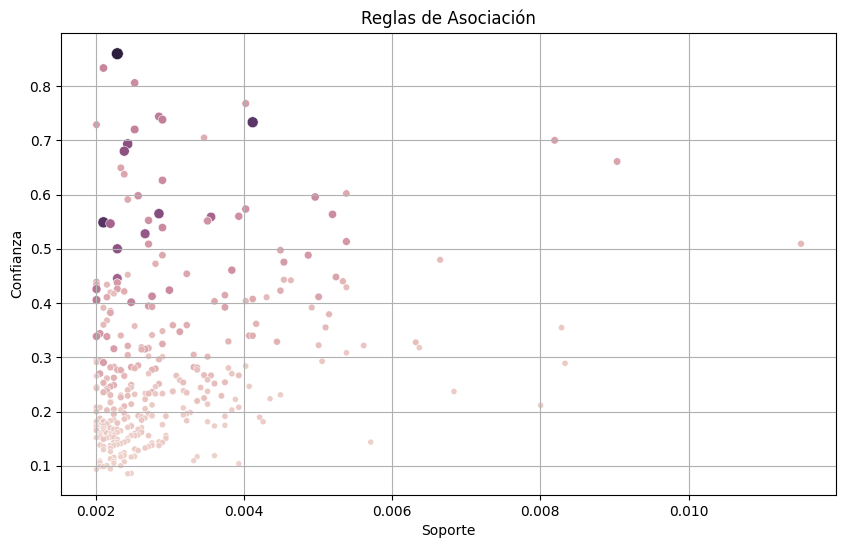

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', legend=False)
plt.title('Reglas de Asociación')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.grid()
plt.show()

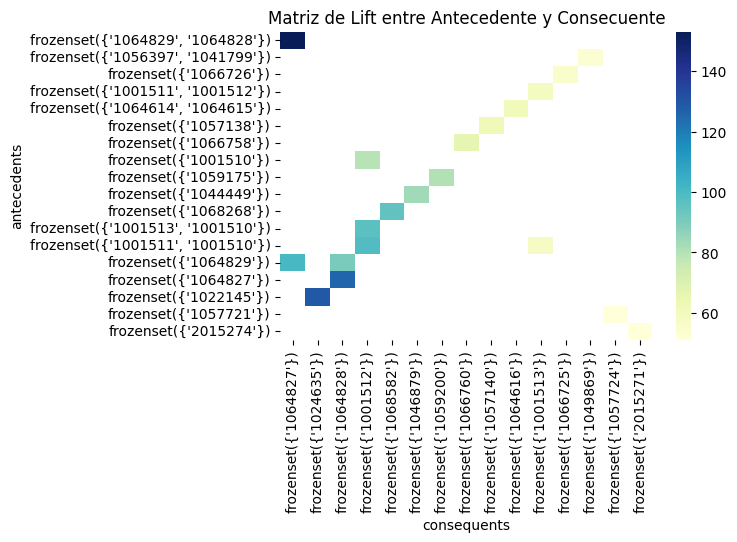

In [283]:
top_rules = rules.sort_values(by='lift', ascending=False).head(20)
pivot = top_rules.pivot_table(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title("Matriz de Lift entre Antecedente y Consecuente")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

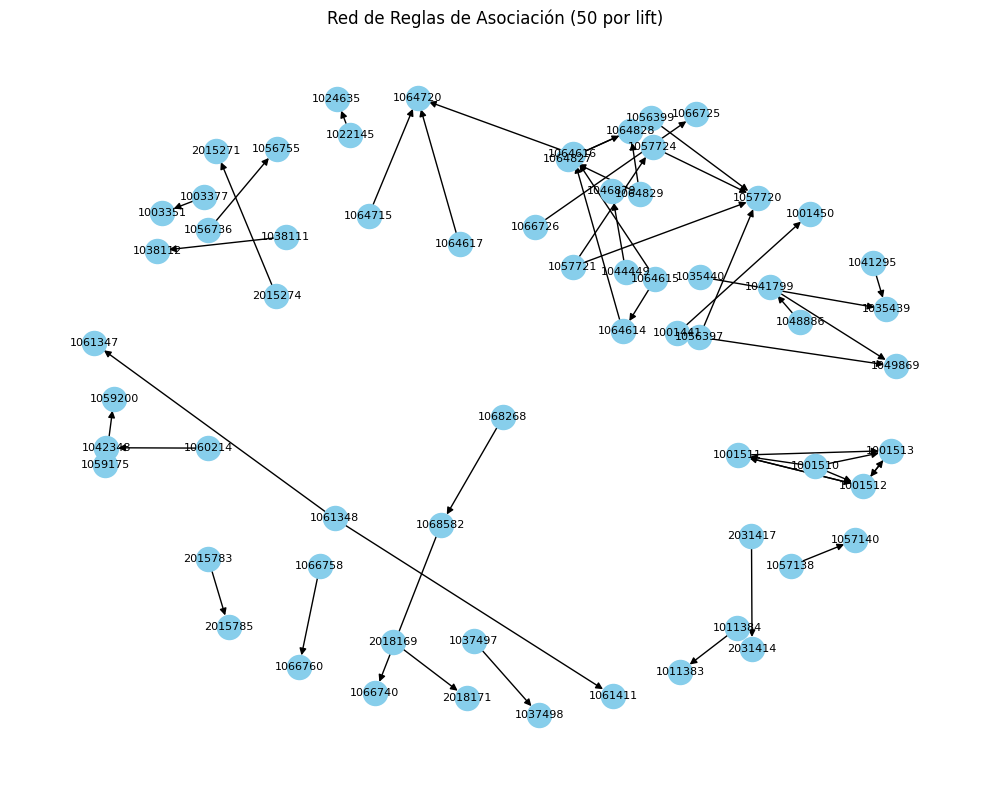

In [289]:
#!pip install -q networkx
import networkx as nx

top_rules = rules.sort_values(by='lift', ascending=False).head(50)

# grafo
G = nx.DiGraph()
edge_labels = {}

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])
            edge_labels[(antecedent, consequent)] = f"lift={row['lift']:.2f}"

# fijar layout con seed para estabilidad
pos = nx.spring_layout(G, k=2.5, iterations=100, seed=425)

plt.figure(figsize=(10, 8))
node_size = 300
font_size = 8

# nodos y etiquetas
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=font_size)

# flechas
nx.draw_networkx_edges(
    G, pos,
    edge_color='black',
    arrows=True,
    arrowstyle='-|>',
    arrowsize=10,
    width=1
)

plt.title('Red de Reglas de Asociación (50 por lift)', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

# Reorganización

In [290]:
df_products.dropna(inplace=True)

In [291]:
df_products['Reference Code'] = df_products['Reference Code'].astype(int)
codigo_a_nombre = dict(zip(df_products['Reference Code'], df_products['SKU Name']))


In [292]:
codigo_a_nombre

{1069946: 'Chocolatina Gol Melo 100 gr',
 1001528: 'Galletas Noel Sultana x 12 paquetes 440 gr',
 1049450: 'Galletas Festival Minichips Chocolate Bolsa x 8 paquetes 280 gr',
 1035440: 'Galletas Tosh Wafer Kiwi x 6 unidades 162 gr',
 1049870: 'Cocoa Natural 14-16% Cordillera 1000 gr',
 1044122: 'Maní La Especial Habas Mix 150 gr',
 1001069: 'Salchichas Viena Rica 150 gr',
 1064906: 'Galletas Ducales x 5 Tacos 500 gr',
 1068253: 'Chocolatina Gol Bolsa 84 gr',
 1073843: 'Golosina Jet Wafer Cuadritos sabor a Vainilla Bandeja 6 unidades',
 1020082: 'Salchichas Viena limón Zenú 150 gr',
 1068584: 'Jumbo Maní Bolsa x 6 unidades 210 gr',
 1075718: 'Galleta  Noel  Wafer  Coco 12 unidades',
 1074890: 'Galletas Dux Salditas 16 Galletas',
 1056398: 'Chips de chocolate Cordillera Semiamargos 47% 1000 gr',
 2017677: 'Maquina Chocotera Corona Multibebida 1Unidad',
 2020120: 'Bebida Tosh Almendra 1000 ml',
 1065127: 'Capsulas Chocolate Corona Centto 115 gr',
 1064715: 'Capsulas Colcafe Chai Latte Cent

In [293]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: frozenset([int(i) for i in x]))
rules['consequents'] = rules['consequents'].apply(lambda x: frozenset([int(i) for i in x]))

In [294]:
def traducir_codigos_a_nombres_set(codigos):
    return frozenset([codigo_a_nombre.get(c, str(c)) for c in codigos])



rules['antecedents_name'] = rules['antecedents'].apply(traducir_codigos_a_nombres_set)
rules['consequents_name'] = rules['consequents'].apply(traducir_codigos_a_nombres_set)



rules['n_antecedents'] = rules['antecedents'].apply(len)
rules['n_consequents'] = rules['consequents'].apply(len)

In [295]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,regla_sin_direccion,antecedents_name,consequents_name,n_antecedents,n_consequents
168,"(1064828, 1064829)",(1064827),0.002669,0.005618,0.002294,0.859649,153.010380,1.0,0.002279,7.084970,0.996123,0.382813,0.858856,0.633991,"(1064829, 1064828, 1064827)","(Proteina liquida Bénet Vainilla Banano 250 ml, Proteina Liquida Bénet Café Cappuccino 250 ml)",(Proteina liquida Bénet Frutos Rojos 250 ml),2,1
554,"(1056397, 1041799)",(1049869),0.002528,0.015544,0.002107,0.833333,53.611948,1.0,0.002068,5.906737,0.983835,0.131965,0.830702,0.484438,"(1056397, 1041799, 1049869)","(Cobertura Cordillera 30% 1000 gr, Chips de Chocolate Blancos Cordillera 1000 gr)",(Chunks Cordillera 47% 1000 gr),2,1
388,"(1035440, 1041295)",(1035439),0.003137,0.016199,0.002528,0.805970,49.753516,1.0,0.002477,5.070358,0.982984,0.150418,0.802775,0.481020,"(1035439, 1035440, 1041295)","(Galletas Tosh Wafer Kiwi x 6 unidades 162 gr, Galletas Tosh Wafer Fresa-Acaí x 6 unidades 162 gr)",(Galletas Tosh Wafer Coco x 6 unidades 162 gr),2,1
639,"(1064617, 1064715)",(1064720),0.005244,0.020226,0.004026,0.767857,37.964492,1.0,0.003920,4.220566,0.978792,0.187773,0.763065,0.483466,"(1064617, 1064720, 1064715)","(Capsulas Colcafe Chai Latte Centto 110 gr, Cápsulas Colcafé Cappuccino Clasico Centto 115 gr)",(Cápsulas Colcafé Cappuccino Vainilla Centto 115 gr),2,1
340,"(1064614, 1064615)",(1064616),0.003839,0.012126,0.002856,0.743902,61.347537,1.0,0.002809,3.857413,0.987491,0.217857,0.740759,0.489712,"(1064614, 1064615, 1064616)","(Capsulas Matiz Escarlata Centto 70 gr, Capsulas Matiz Ébano Centto 80 gr)",(Capsulas Matiz Ambar Centto 80 gr),2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,(1001588),(2015885),0.021443,0.039749,0.002107,0.098253,2.471839,1.0,0.001255,1.064879,0.608491,0.035658,0.060926,0.075628,"(1001588, 2015885)",(Galletas Wafer Noel Vainilla x 18 paquetes 432 gr),(Atún Lomos en Aceite de Girasol Zenú 160 gr),1,1
260,(1059133),(2015885),0.023363,0.039749,0.002200,0.094188,2.369575,1.0,0.001272,1.060100,0.591810,0.036126,0.056693,0.074774,"(1059133, 2015885)",(Galletas Saltín Noel 10 Tacos 805gr),(Atún Lomos en Aceite de Girasol Zenú 160 gr),1,1
373,(1029291),(1064996),0.021583,0.030385,0.002013,0.093275,3.069755,1.0,0.001357,1.069360,0.689115,0.040300,0.064861,0.079766,"(1064996, 1029291)",(Galletas Ducales Provocacion Bolsa x 6 paquetes 168 gr),(Galleta Tosh Miel FIT Bolsa 9x3 243 gr),1,1
23,(2011706),(1064996),0.028840,0.030385,0.002481,0.086039,2.831597,1.0,0.001605,1.060893,0.666051,0.043729,0.057398,0.083852,"(1064996, 2011706)",(Maíz Dulce Zenú 241 gr),(Galleta Tosh Miel FIT Bolsa 9x3 243 gr),1,1


In [296]:
pd.set_option('display.max_colwidth', None)
rules[["antecedents", "antecedents_name"]]

,antecedents,antecedents_name
168,"(1064828, 1064829)","(Proteina liquida Bénet Vainilla Banano 250 ml, Proteina Liquida Bénet Café Cappuccino 250 ml)"
554,"(1056397, 1041799)","(Cobertura Cordillera 30% 1000 gr, Chips de Chocolate Blancos Cordillera 1000 gr)"
388,"(1035440, 1041295)","(Galletas Tosh Wafer Kiwi x 6 unidades 162 gr, Galletas Tosh Wafer Fresa-Acaí x 6 unidades 162 gr)"
639,"(1064617, 1064715)","(Capsulas Colcafe Chai Latte Centto 110 gr, Cápsulas Colcafé Cappuccino Clasico Centto 115 gr)"
340,"(1064614, 1064615)","(Capsulas Matiz Escarlata Centto 70 gr, Capsulas Matiz Ébano Centto 80 gr)"
...,...,...
490,(1001588),(Galletas Wafer Noel Vainilla x 18 paquetes 432 gr)
260,(1059133),(Galletas Saltín Noel 10 Tacos 805gr)
373,(1029291),(Galletas Ducales Provocacion Bolsa x 6 paquetes 168 gr)
23,(2011706),(Maíz Dulce Zenú 241 gr)


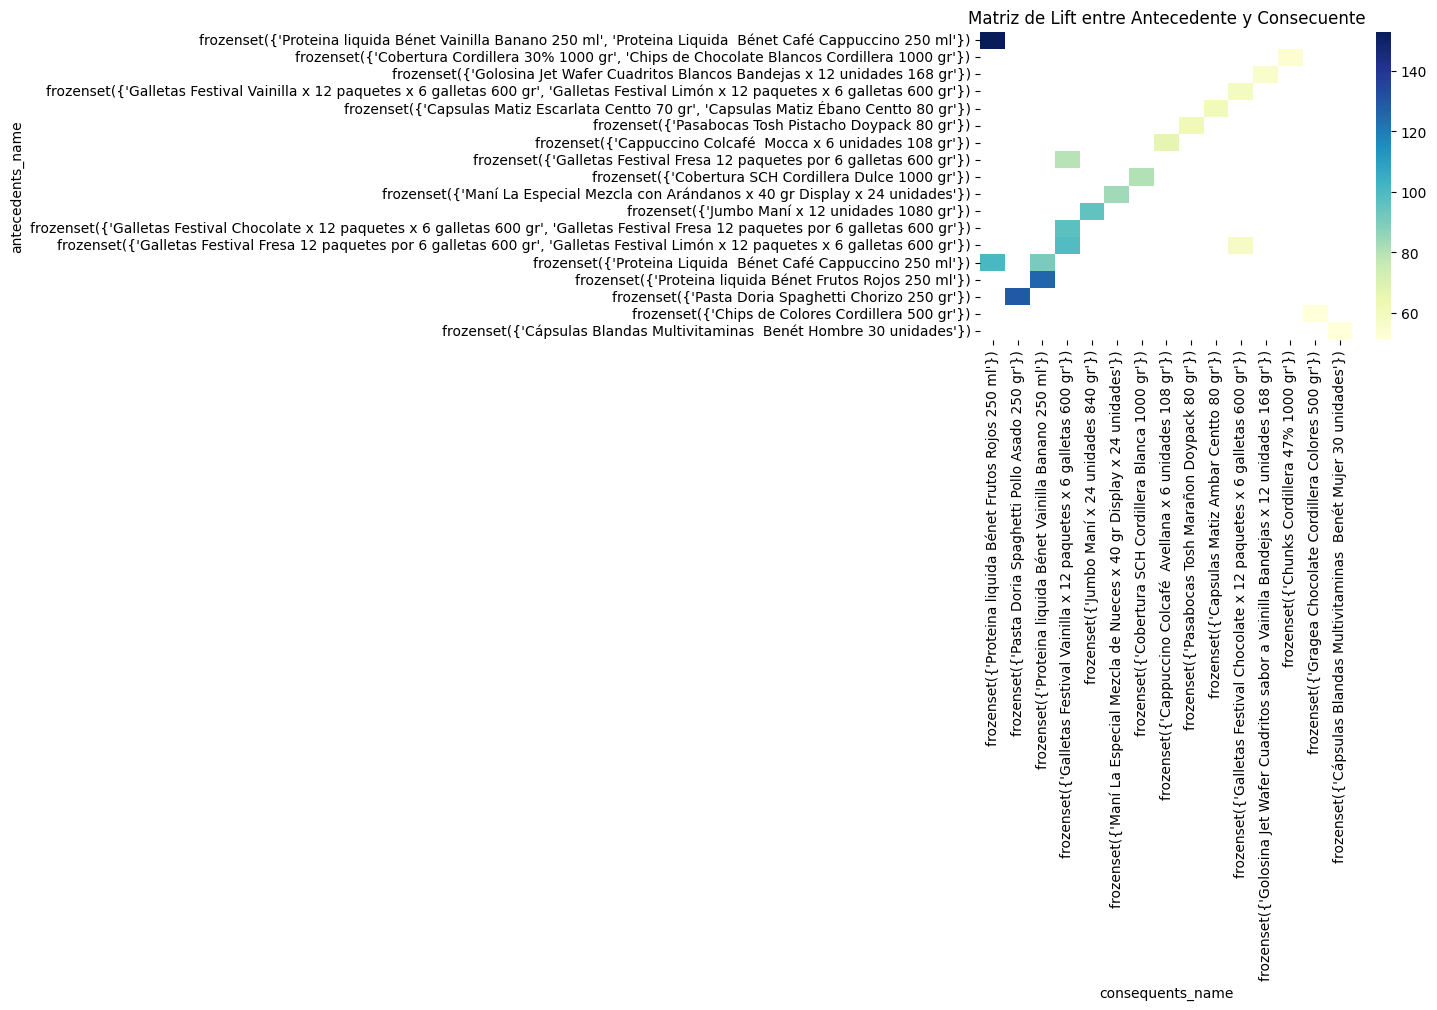

In [297]:
top_rules = rules.sort_values(by='lift', ascending=False).head(20)
pivot = top_rules.pivot_table(index='antecedents_name', columns='consequents_name', values='lift')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=False, fmt=".2f", cmap="YlGnBu")
plt.title("Matriz de Lift entre Antecedente y Consecuente")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

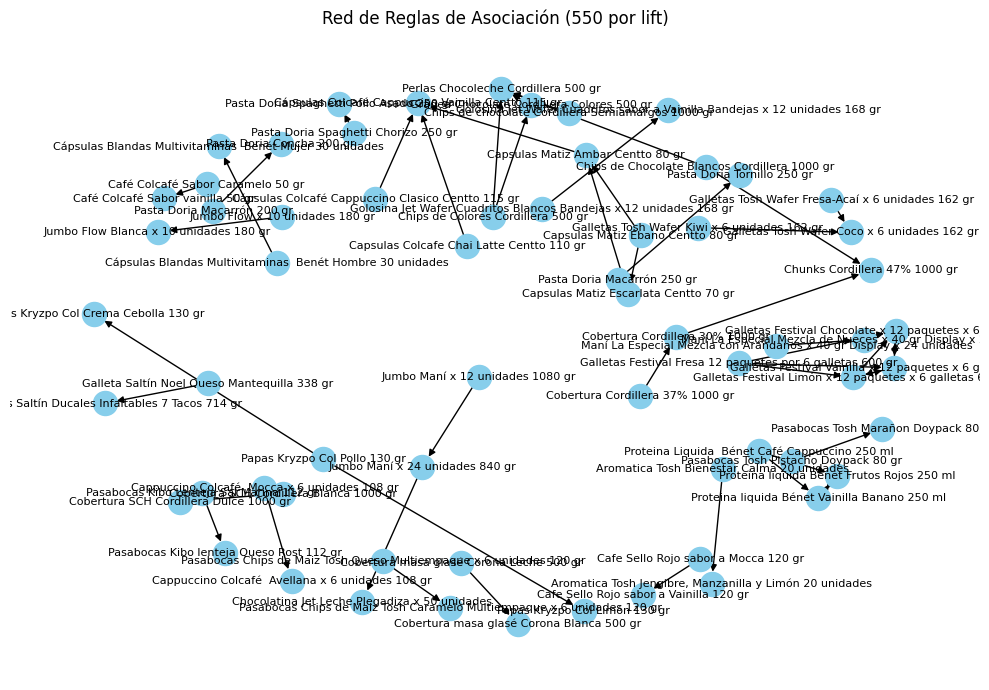

In [298]:
import matplotlib.pyplot as plt
import networkx as nx

top_rules = rules.sort_values(by='lift', ascending=False).head(50)

# grafo
G = nx.DiGraph()
edge_labels = {}

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents_name']:
        for consequent in row['consequents_name']:
            G.add_edge(antecedent, consequent, weight=row['lift'])
            edge_labels[(antecedent, consequent)] = f"lift={row['lift']:.2f}"
            
# Fijar layout con semilla para que no cambie en cada ejecución
pos = nx.spring_layout(G, k=2.5, iterations=100, seed=425)

plt.figure(figsize=(10, 7))
node_size = 300
font_size = 8

# nodos
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='skyblue')

# etiquetas con nombres de productos
nx.draw_networkx_labels(G, pos, font_size=font_size)

# flechas
nx.draw_networkx_edges(
    G, pos,
    edge_color='black',
    arrows=True,
    arrowstyle='-|>',
    arrowsize=10,
    width=1
)

plt.title('Red de Reglas de Asociación (550 por lift)', fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

In [300]:
# top reglas
top_rules = rules.sort_values(by='lift', ascending=False).head(50)

# grafo
G = nx.DiGraph()
edge_labels = {}

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents_name']:
        for consequent in row['consequents_name']:
            G.add_edge(antecedent, consequent, weight=row['lift'])
            edge_labels[(antecedent, consequent)] = f"Lift: {row['lift']:.2f} | Confianza: {row['confidence']:.2f}"

#layout de nodos
pos = nx.spring_layout(G, k=2.5, iterations=100, seed=425)

Xn = [pos[k][0] for k in G.nodes()]
Yn = [pos[k][1] for k in G.nodes()]
labels = list(G.nodes())

# Conexiones (grado total)
node_degrees = [G.degree(n) for n in G.nodes()]
node_hovertext = [
    f"{label}<br>Conexiones: {deg}" for label, deg in zip(labels, node_degrees)
]

# aristas
Xe, Ye, edge_text = [], [], []
for e in G.edges(data=True):
    x0, y0 = pos[e[0]]
    x1, y1 = pos[e[1]]
    Xe += [x0, x1, None]
    Ye += [y0, y1, None]
    edge_text.append(f"{e[0]} ⇒ {e[1]}<br>Lift: {e[2]['weight']:.2f}")

#trazos de aristas
edge_trace = go.Scatter(
    x=Xe, y=Ye,
    mode='lines',
    line=dict(color='black', width=1),
    hoverinfo='text',
    text=edge_text
)

# trazos de nodos
node_trace = go.Scatter(
    x=Xn,
    y=Yn,
    mode='markers',
    marker=dict(
        size=20,
        color=node_degrees,
        colorscale='Viridis',
        colorbar=dict(
            thickness=15,
            title='Conexiones (grado)',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    ),
    text=node_hovertext,
    hoverinfo='text'
)

# layout final
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Red de Reglas de Asociación (nombres, lift y conexiones)',
                    titlefont_size=16,
                    width=1000,
                    height=700, 
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=40, l=40, r=40, t=60),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# exportar
fig.show()
fig.write_html("red_reglas_asociacion.html")

In [301]:
cols = list(rules.columns)
# Extraer manualmente el nuevo orden
new_order = [
    'antecedents',
    'consequents',
    'antecedents_name',
    'consequents_name',
    'n_antecedents',
    'n_consequents',
] + [col for col in rules.columns if col not in ['antecedents_name', 'consequents_name', 'antecedents', 'consequents', 'n_antecedents', 'n_consequents']]

rules = rules[new_order]

In [302]:
rules.to_excel("apriori_analysis_general.xlsx", index = False)

# Libreria apriori

In [205]:
frequent_itemsets = apriori(df_reducido, min_support=0.002, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()

KeyboardInterrupt: 

In [ ]:
frequent_itemsets

,support,itemsets
0,0.017463,(1000083)
1,0.006929,(1000084)
2,0.006508,(1000182)
3,0.018915,(1000855)
4,0.006695,(1001069)
...,...,...
307,0.009036,"(1064617, 1064720)"
308,0.008193,"(1064715, 1064720)"
309,0.008334,"(2015885, 2011706)"
310,0.006836,"(2015886, 2011706)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="lift", ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
3,(1064720),(1064617),0.009036,0.446759,32.679216
2,(1064617),(1064720),0.009036,0.660959,32.679216
1,(1056399),(1056397),0.011517,0.432337,19.118624
0,(1056397),(1056399),0.011517,0.509317,19.118624


In [ ]:
rules.shape

(4, 14)

In [ ]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12,(1037497),(1037498),0.009223,0.011377,0.005197,0.563452,49.525788,1.0,0.005092,2.264637,0.988930,0.337386,0.558428,0.510121
13,(1037498),(1037497),0.011377,0.009223,0.005197,0.456790,49.525788,1.0,0.005092,1.823930,0.991084,0.337386,0.451733,0.510121
20,(1057720),(1057724),0.012547,0.010487,0.005384,0.429104,40.916261,1.0,0.005253,1.733264,0.987956,0.305040,0.423054,0.471249
21,(1057724),(1057720),0.010487,0.012547,0.005384,0.513393,40.916261,1.0,0.005253,2.029260,0.985899,0.305040,0.507210,0.471249
35,(1064720),(1064715),0.020226,0.011705,0.008193,0.405093,34.609491,1.0,0.007957,1.661259,0.991153,0.345168,0.398047,0.552546
34,(1064715),(1064720),0.011705,0.020226,0.008193,0.700000,34.609491,1.0,0.007957,3.265914,0.982607,0.345168,0.693807,0.552546
5,(1001511),(1001513),0.012173,0.012501,0.005010,0.411538,32.921536,1.0,0.004857,1.678104,0.981573,0.254762,0.404089,0.406144
4,(1001513),(1001511),0.012501,0.012173,0.005010,0.400749,32.921536,1.0,0.004857,1.648437,0.981899,0.254762,0.393365,0.406144
31,(1064617),(1064715),0.013671,0.011705,0.005244,0.383562,32.769973,1.0,0.005084,1.603235,0.982922,0.260465,0.376261,0.415781
30,(1064715),(1064617),0.011705,0.013671,0.005244,0.448000,32.769973,1.0,0.005084,1.786828,0.980966,0.260465,0.440349,0.415781


# RFM

In [ ]:
rfm = pd.read_excel(r"C:\Users\ssjsmoncada\Documents\Nutresa\06. TNC\03. RFM\output\rfm_recuperados_2024-10-01&2025-03-31.xlsx")
rfm = rfm[["Client Document", "Email", "Client Name", "Client Last Name", "segment_adjust"]]

In [ ]:
rfm['Client Document'] = pd.to_numeric(rfm['Client Document'], errors='coerce')
rfm = rfm.dropna(subset=['Client Document'])

In [ ]:
df_rfm = df.copy()
df_rfm['Client Document'] = pd.to_numeric(df_rfm['Client Document'], errors='coerce')
df_rfm = df_rfm.dropna(subset=['Client Document'])

In [ ]:
rfm["Client Document"] = rfm["Client Document"].astype(int)
df_rfm["Client Document"] = df_rfm["Client Document"].astype(int)

In [ ]:
df_filtrado = df_rfm.merge(
    rfm[['Client Document', 'Email', "segment_adjust"]], on='Client Document', how='inner')


In [ ]:
# Filtrado de acuerdo a fechas del RFM
df_filtrado = df_filtrado[(
    df_filtrado['Creation Date'] >= '2024-10-01') & (df_filtrado['Creation Date'] <= '2025-03-31')]

### Empresas

In [ ]:
corporativos = pd.read_excel(
    r"C:\Users\ssjsmoncada\Documents\Nutresa\06. TNC\00. Historico Ventas\Query_Consolidado.xlsx", sheet_name="Corporativos")

In [ ]:
"""
empleados =  
"""


In [ ]:
df_filtrado = df_filtrado.merge(
    corporativos["Corporate Document"], how='left', left_on="Client Document", right_on="Corporate Document")

In [ ]:
df_filtrado

,Order,Creation Date,Client Document,Coupon,Payment Value,Quantity_SKU,Reference Code,SKU Name,SKU Value,SKU Selling Price,...,Discounts Totals,Discounts Names,Corporate Document_x,Taxes,Discount Index,Discount,Mes_Año,Email,segment_adjust,Corporate Document_y
0,1424200526525-01,2024-10-04 14:33:16+00:00,43523740,soyelixir,551692,4,1028143,Maní La Especial Mezcla de Arándanos Doypack 1...,7595.0,6456.0,...,-69011.0,"Soyelixir, Flete gratis",NaN,160635.0,14.996708,1139.0,2024-10,adriana.arango.h12@gmail.com,En riesgo,NaN
1,1424200526525-01,2024-10-04 14:33:16+00:00,43523740,soyelixir,551692,1,1020434,Jumbo Almendra x 12 unidades 1200 gr,51846.0,44069.0,...,-69011.0,"Soyelixir, Flete gratis",NaN,160635.0,15.000193,7777.0,2024-10,adriana.arango.h12@gmail.com,En riesgo,NaN
2,1424200526525-01,2024-10-04 14:33:16+00:00,43523740,soyelixir,551692,4,1031912,Maní La Especial Mezcla de Chocolate Doypack 1...,7595.0,6456.0,...,-69011.0,"Soyelixir, Flete gratis",NaN,160635.0,14.996708,1139.0,2024-10,adriana.arango.h12@gmail.com,En riesgo,NaN
3,1424200526525-01,2024-10-04 14:33:16+00:00,43523740,soyelixir,551692,12,1043756,Paleta Chocolisto 50 gr,1530.0,1301.0,...,-69011.0,"Soyelixir, Flete gratis",NaN,160635.0,14.967320,229.0,2024-10,adriana.arango.h12@gmail.com,En riesgo,NaN
4,1424200526525-01,2024-10-04 14:33:16+00:00,43523740,soyelixir,551692,10,1047379,Paleta Aloha Mix Frutos Rojos 80 gr,1670.0,1420.0,...,-69011.0,"Soyelixir, Flete gratis",NaN,160635.0,14.970060,250.0,2024-10,adriana.arango.h12@gmail.com,En riesgo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52273,1519090564372-01,2025-03-21 08:12:49+00:00,1020467374,NaN,124207,2,2020372,Cereal Tosh Granola Chocolate 500 gr,24621.0,24621.0,...,0.0,Flete gratis,NaN,19831.0,0.000000,0.0,2025-03,bryan.bedoy@gmail.com,Promesas,NaN
52274,1519090564372-01,2025-03-21 08:12:49+00:00,1020467374,NaN,124207,2,1021747,Maní La Especial Mezcla de Arándanos Doypack 4...,19919.0,19919.0,...,0.0,Flete gratis,NaN,19831.0,0.000000,0.0,2025-03,bryan.bedoy@gmail.com,Promesas,NaN
52275,1519090564372-01,2025-03-21 08:12:49+00:00,1020467374,NaN,124207,2,1004241,Maní La Especial Maiz Tostado Doypack 160 gr,7648.0,7648.0,...,0.0,Flete gratis,NaN,19831.0,0.000000,0.0,2025-03,bryan.bedoy@gmail.com,Promesas,NaN
52276,1519080564371-01,2025-03-21 07:16:08+00:00,98697194,NaN,209678,2,2018288,Aceite de Oliva Litro Monticello 1000 ml,76500.0,76500.0,...,0.0,Flete gratis,NaN,33478.0,0.000000,0.0,2025-03,shadowjuanes@gmail.com,Pro,NaN


In [ ]:
df_filtrado["Categoria Cliente"] = np.where(
    df_filtrado["Corporate Document_y"].notna(),  # Si "Corporate Document_y" no es nulo
    "Corporativo",
    np.where(
        df_filtrado["es_empleado"].notna(),  # Si "es_empleado" no es nulo
        "Empleado",
        "Persona natural"  # Si ambas condiciones son falsas
    )
)